NASSCOM MINI PROJECT

NAME: likith u

ID NO: 20191COM0212

SECTION: 5COM4


Predict Fuel Efficiency

Let’s import the necessary libraries to get started with this task:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
dataset = pd.read_csv("/content/dataset.txt",sep=",")

In [4]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
print("presenceof null values:"+str(dataset.isnull().values.any()))

presenceof null values:False


Clean the data

In [8]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [10]:
dataset = dataset.dropna()
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=398)

In [12]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [13]:
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
print(origin)

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64


### **Now, let’s split the data into training and test sets:**

In [14]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset)

      mpg  cylinders  displacement  ...  USA  Europe  Japan
65   14.0          8         351.0  ...  1.0     0.0    0.0
132  25.0          4         140.0  ...  1.0     0.0    0.0
74   13.0          8         302.0  ...  1.0     0.0    0.0
78   21.0          4         120.0  ...  0.0     1.0    0.0
37   18.0          6         232.0  ...  1.0     0.0    0.0
..    ...        ...           ...  ...  ...     ...    ...
207  20.0          4         130.0  ...  0.0     1.0    0.0
279  29.5          4          98.0  ...  0.0     0.0    1.0
227  19.0          6         225.0  ...  1.0     0.0    0.0
148  26.0          4         116.0  ...  0.0     1.0    0.0
143  26.0          4          97.0  ...  0.0     1.0    0.0

[318 rows x 11 columns]


In [15]:
print(test_dataset)

      mpg  cylinders  displacement  ...  USA  Europe  Japan
9    15.0          8         390.0  ...  1.0     0.0    0.0
25   10.0          8         360.0  ...  1.0     0.0    0.0
28    9.0          8         304.0  ...  1.0     0.0    0.0
31   25.0          4         113.0  ...  0.0     0.0    1.0
32   25.0          4          98.0  ...  1.0     0.0    0.0
..    ...        ...           ...  ...  ...     ...    ...
368  27.0          4         112.0  ...  1.0     0.0    0.0
370  31.0          4         112.0  ...  1.0     0.0    0.0
382  34.0          4         108.0  ...  0.0     0.0    1.0
384  32.0          4          91.0  ...  0.0     0.0    1.0
396  28.0          4         120.0  ...  1.0     0.0    0.0

[80 rows x 11 columns]


### **visualize the data by using the seaborn’s pair plot method:**

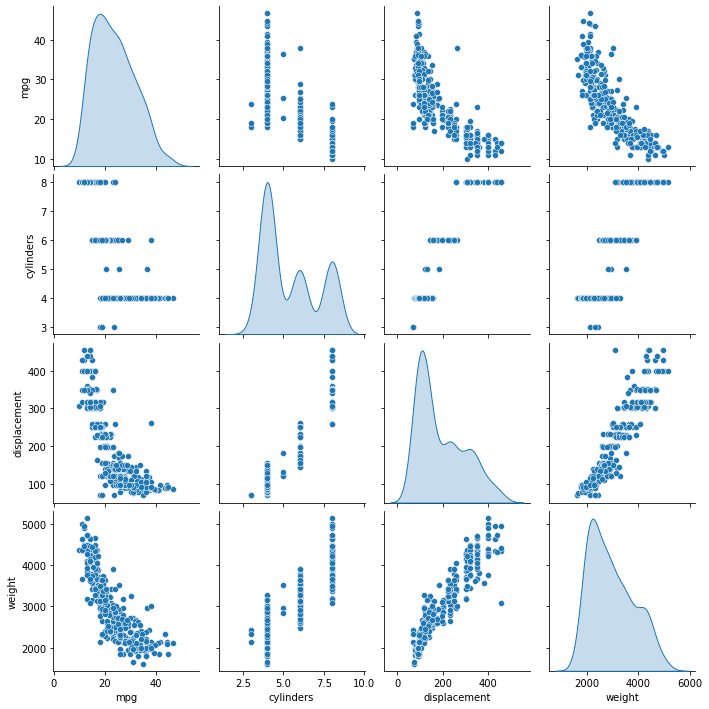

In [16]:
import seaborn as sns
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

### **using bar plot**

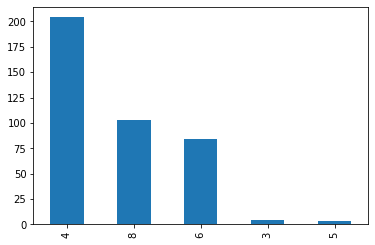

In [17]:
pd.value_counts(dataset['cylinders']).plot.bar()

### **prediction using box plot**

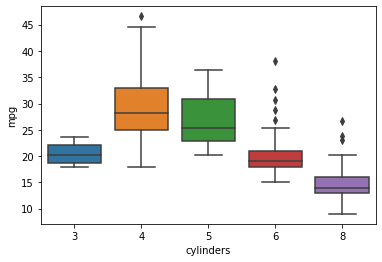

In [18]:
sns.boxplot(x='cylinders',y='mpg',data=dataset)

A boxplot will help us better visualize what is happening with the data. Using seaborn’s builtin boxplot method, I’ve made the plot below, which plots car origin against the mpgs of the individual cars:


### **Heat map**

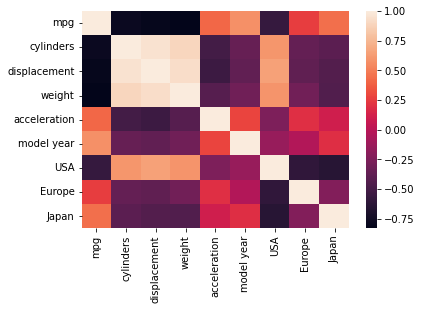

In [19]:
corr = dataset.corr()
sns.heatmap(corr)
plt.show()

### **Now,separate the target values from the features in the dataset. This label is that feature that I will use to train the model to predict fuel efficiency:**

In [20]:
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')
print(train_labels)

65     14.0
132    25.0
74     13.0
78     21.0
37     18.0
       ... 
207    20.0
279    29.5
227    19.0
148    26.0
143    26.0
Name: mpg, Length: 318, dtype: float64


In [21]:
print(test_labels)

9      15.0
25     10.0
28      9.0
31     25.0
32     25.0
       ... 
368    27.0
370    31.0
382    34.0
384    32.0
396    28.0
Name: mpg, Length: 80, dtype: float64


In [22]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('cylinders')
test_labels = test_features.pop('cylinders')

### **overall statistics**

In [23]:
train_stats=train_dataset.describe()
train_stats.pop("cylinders")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
model year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


### **Normalize The Data**

In [24]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data

,Europe,Japan,USA,acceleration,car name,cylinders,displacement,horsepower,model year,weight
65,-0.441445,-0.491351,0.746369,-0.928344,NaN,NaN,1.521380,NaN,-1.065117,1.379315
132,-0.441445,-0.491351,0.746369,0.502127,NaN,NaN,-0.511125,NaN,-0.525344,-0.499348
74,-0.441445,-0.491351,0.746369,0.144509,NaN,NaN,1.049377,NaN,-1.065117,1.574639
78,2.258163,-0.491351,-1.335607,1.396171,NaN,NaN,-0.703780,NaN,-1.065117,0.017965
37,-0.441445,-0.491351,0.746369,-0.034300,NaN,NaN,0.375086,NaN,-1.335003,0.383754
...,...,...,...,...,...,...,...,...,...,...
207,2.258163,-0.491351,-1.335607,0.037224,NaN,NaN,-0.607453,NaN,0.014428,0.220392
279,-0.441445,2.028805,-1.335607,0.359080,NaN,NaN,-0.915700,NaN,0.554200,-0.981147
227,-0.441445,-0.491351,0.746369,0.752459,NaN,NaN,0.307657,NaN,0.284314,0.788608
148,2.258163,-0.491351,-1.335607,-0.570726,NaN,NaN,-0.742311,NaN,-0.525344,-0.849747


In [25]:
normed_test_data

,Europe,Japan,USA,acceleration,car name,cylinders,displacement,horsepower,model year,weight
9,-0.441445,-0.491351,0.746369,-2.537624,NaN,NaN,1.897057,NaN,-1.604889,1.049040
25,-0.441445,-0.491351,0.746369,-0.570726,NaN,NaN,1.608075,NaN,-1.604889,1.954633
28,-0.441445,-0.491351,0.746369,1.038553,NaN,NaN,1.068642,NaN,-1.604889,2.093136
31,-0.441445,2.028805,-1.335607,-0.570726,NaN,NaN,-0.771209,NaN,-1.335003,-0.871055
32,-0.441445,-0.491351,0.746369,1.217362,NaN,NaN,-0.915700,NaN,-1.335003,-1.086504
...,...,...,...,...,...,...,...,...,...,...
368,-0.441445,-0.491351,0.746369,1.074315,NaN,NaN,-0.780842,NaN,1.633745,-0.383337
370,-0.441445,-0.491351,0.746369,0.216033,NaN,NaN,-0.780842,NaN,1.633745,-0.460283
382,-0.441445,2.028805,-1.335607,0.466365,NaN,NaN,-0.819373,NaN,1.633745,-0.850931
384,-0.441445,2.028805,-1.335607,0.037224,NaN,NaN,-0.983129,NaN,1.633745,-1.182390


In [26]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,5.427673,1.682941
displacement,193.061321,103.812742
weight,2963.823899,844.749805
acceleration,15.595912,2.796282
model year,75.946541,3.705266
USA,0.641509,0.480313
Europe,0.163522,0.370424
Japan,0.194969,0.396801


## **Build The Model**

In [27]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model
model = build_model()
model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


During this notebook, we built a model that could reliably predict a car’s mpg given some information about the car within 2.5 mpg of the actual value.

This model could be trained with newer car data and be used to predict competitor’s future mpg ratings for upcoming cars, allowing companies to potentially resources currently used on R&D today on making more efficient, more popular vehicles that outshine competitors.

While our model may be inaccurate in some cases, we talked about how our dataset can contain inaccurate values for the mpg, and oftentimes, our predictions are more accurate than the values in the dataset.

For newer cars, the collected data is significantly more reliable, so our model will be able to perform better with a different, more accurate dataset.

If you want to optimize spending your resources and outshine the competition, Cocolevio’s machine learning models can help you get the edge you need to succeed in your market.
